<a href="https://colab.research.google.com/github/joohoshin/TensorflowAI/blob/main/8_3_Cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import Image

from google.colab import drive
drive.mount('/g')

Mounted at /g


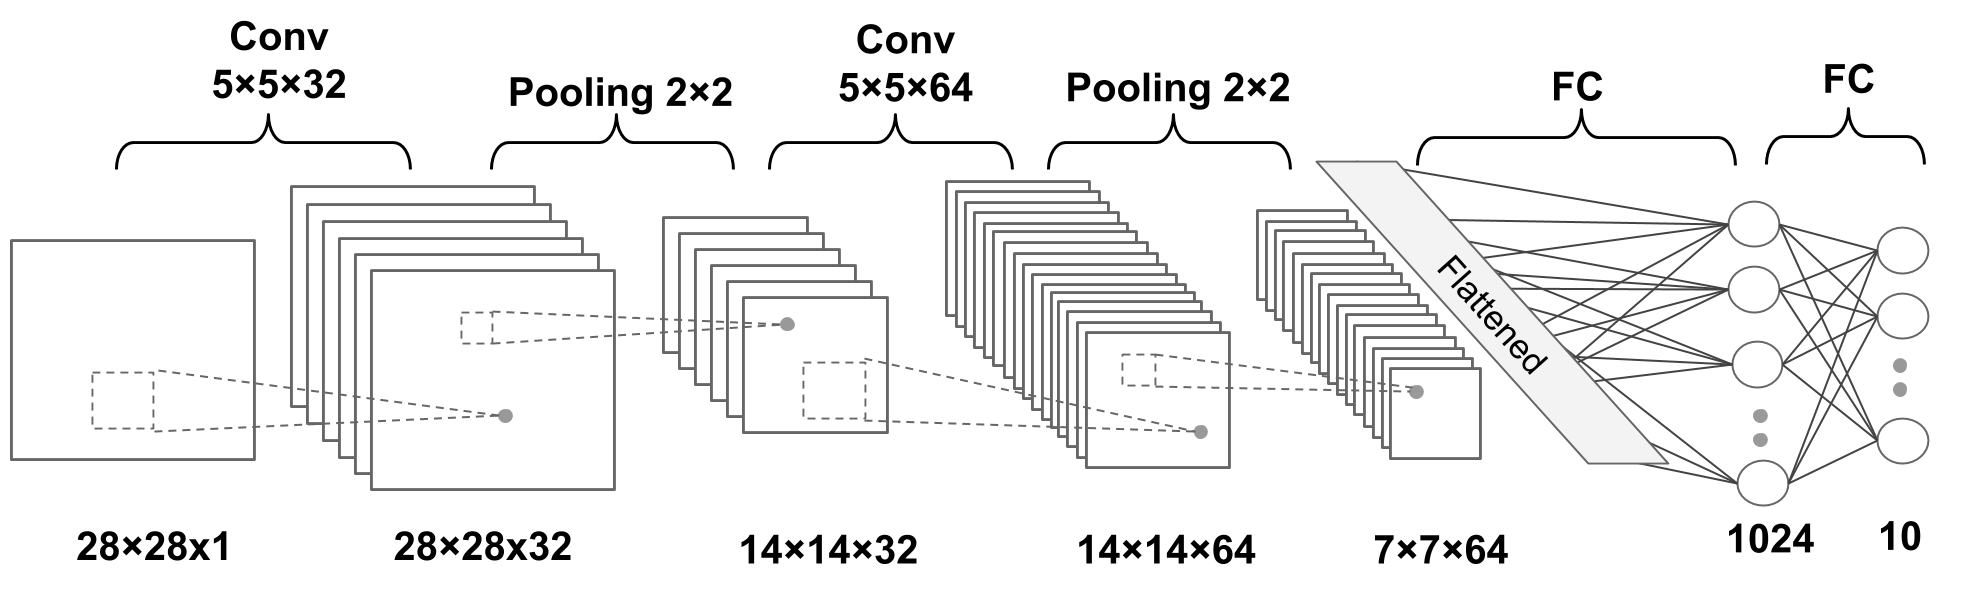

In [ ]:
Image(filename='/g/My Drive/Tensorflow AI/images_ch15/15_12.png', width=600) 

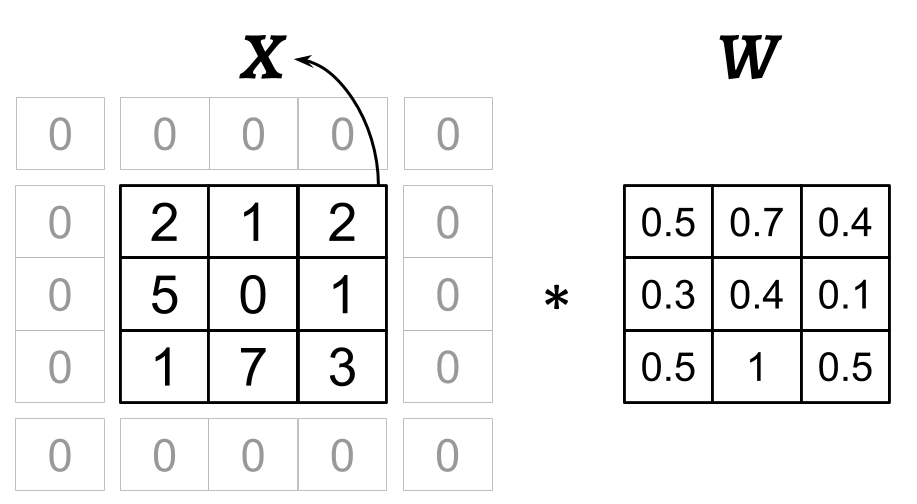

In [ ]:
Image(filename='/g/My Drive/Tensorflow AI/images_ch15/15_06.png', width=600) 

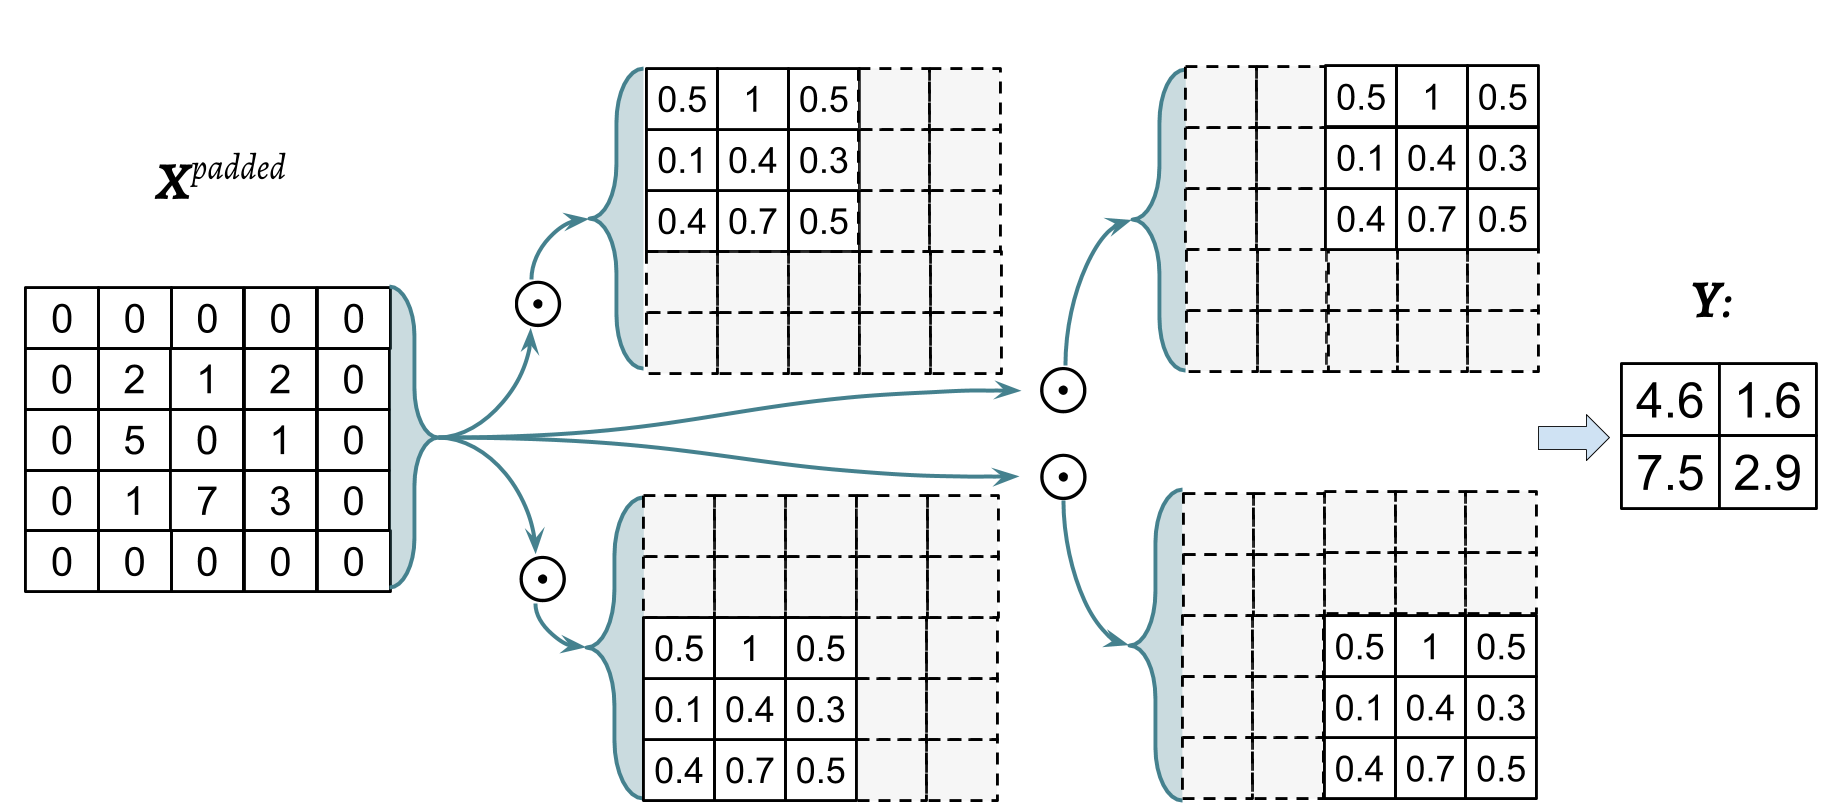

In [ ]:
Image(filename='/g/My Drive/Tensorflow AI/images_ch15/15_07.png', width=600) 

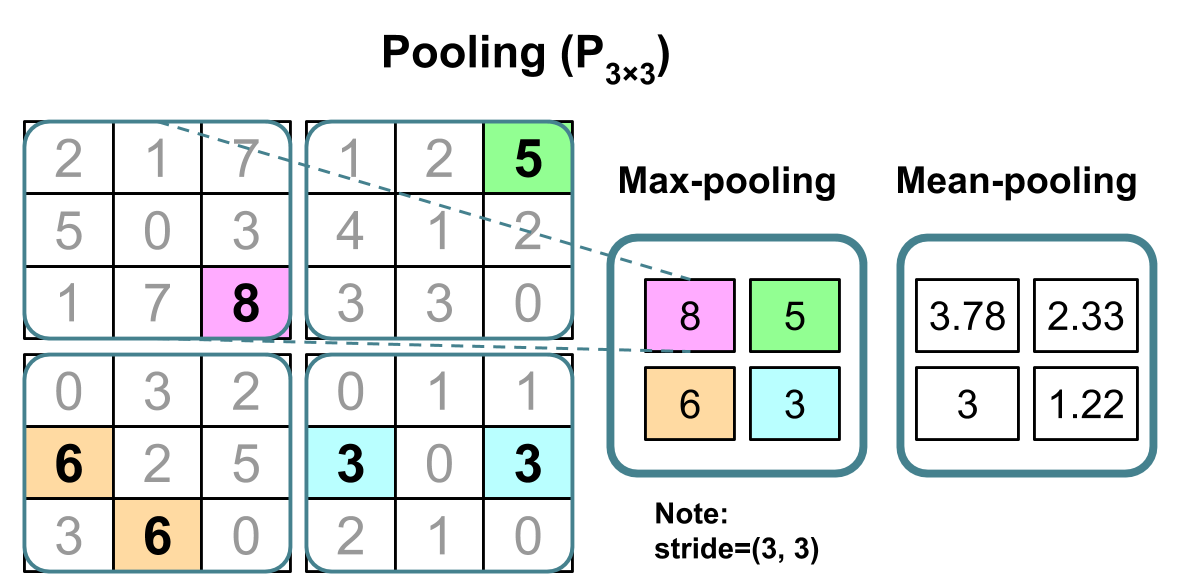

In [ ]:
Image(filename='/g/My Drive/Tensorflow AI/images_ch15/15_08.png', width=600) 

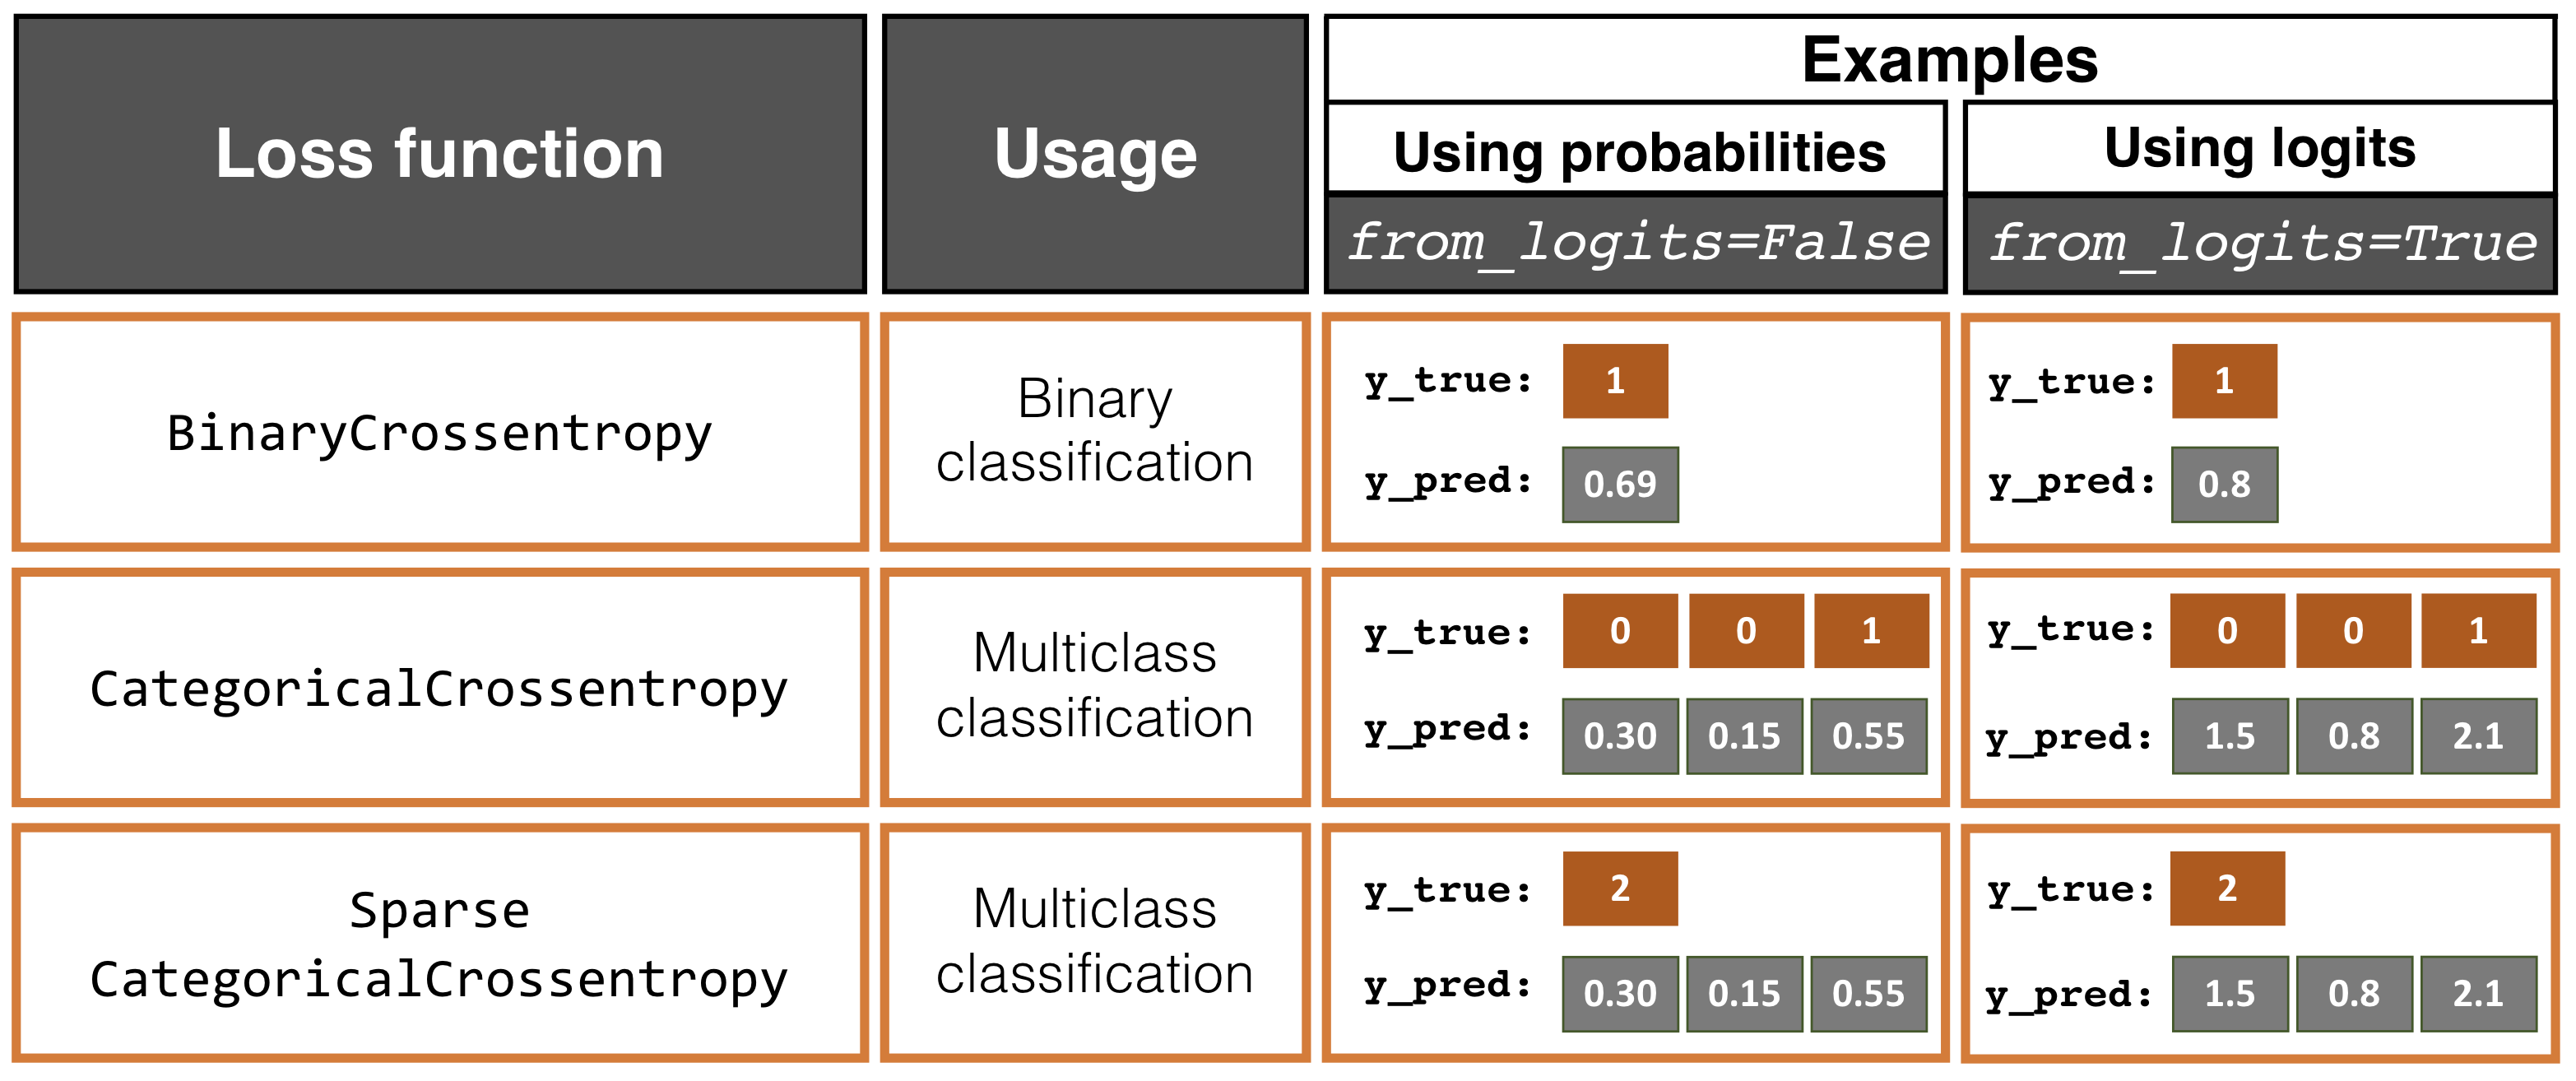

In [ ]:
Image(filename='/g/My Drive/Tensorflow AI/images_ch15/15_11.png', width=600) 

In [ ]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
# train set 에서 10000개를 validation set으로 나눔
x_val, y_val = x_train[50000:,:], y_train[50000:]
x_train, y_train = x_train[:50000, :], y_train[:50000]

In [ ]:
print(x_train.shape)
print(x_val.shape)

(50000, 28, 28)
(10000, 28, 28)


In [ ]:
# 데이터 표준화
import numpy as np
mean = np.mean(x_train, axis=0)

In [ ]:
mean.shape

(28, 28)

In [ ]:
std = np.std(x_train)

In [ ]:
std

78.6661972212754

In [ ]:
x_train_centered = (x_train-mean)/std
x_val_centered = (x_val-mean)/std
x_test_centered = (x_test-mean)/std

In [ ]:
x_train_centered.shape

(50000, 28, 28)

In [ ]:
# one hot encoding
from tensorflow.keras.utils import to_categorical

y_train_onehot = to_categorical(y_train)
y_val_onehot = to_categorical(y_val)
y_test_onehot = to_categorical(y_test)

In [ ]:
print(y_train[0])
print(y_train_onehot[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


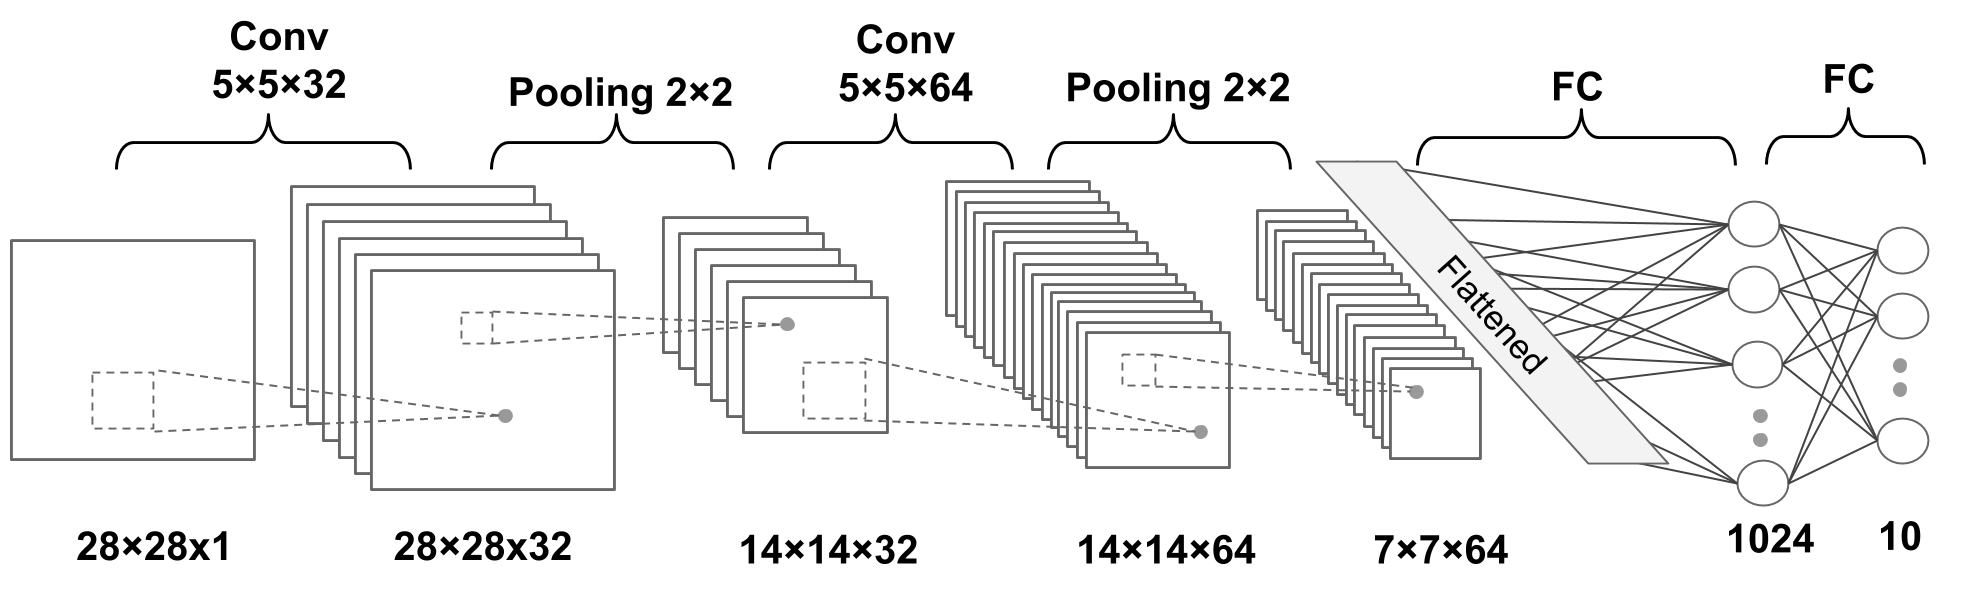

In [ ]:
Image(filename='/g/My Drive/Tensorflow AI/images_ch15/15_12.png', width=600) 

코딩은 아래의 사이즈로 진행하였습니다

28x28x1 --> 24x24x32 --> 12x12x32 --> 8x8x64--> 4x4x64

In [ ]:
# model 만들기

from tensorflow.keras import layers, models

model = models.Sequential()

In [ ]:
model.add(layers.Conv2D(32,(5,5), padding='valid', activation='relu', input_shape=(28,28,1)))

In [ ]:
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64,(5,5), padding='valid', activation='relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Flatten())


In [ ]:
# dense layer에 넣기
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              1049600   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
x_train_c = x_train_centered.reshape(-1, 28,28,1)  # -1은 추정으로 정한다
x_val_c = x_val_centered.reshape(-1,28,28,1)
x_test_c = x_test_centered.reshape(-1,28,28,1)

In [ ]:
import time
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard

callback_list = [ModelCheckpoint(filepath='cnn_checkpoint.h5', monitor='val_loss',
                                 save_best_only=True),
                 TensorBoard(log_dir='logs/{}'.format(time.asctime()))]

In [ ]:
history=model.fit(x_train_c, y_train_onehot, batch_size=64, epochs=20,
                  validation_data=(x_val_c, y_val_onehot), 
                  callbacks=callback_list)

Epoch 1/20
782/782 [==============================] - 37s 9ms/step - loss: 0.2862 - acc: 0.9086 - val_loss: 0.0430 - val_acc: 0.9872
Epoch 2/20
782/782 [==============================] - 6s 8ms/step - loss: 0.0505 - acc: 0.9851 - val_loss: 0.0373 - val_acc: 0.9899
Epoch 3/20
782/782 [==============================] - 6s 8ms/step - loss: 0.0330 - acc: 0.9899 - val_loss: 0.0325 - val_acc: 0.9907
Epoch 4/20
782/782 [==============================] - 6s 8ms/step - loss: 0.0256 - acc: 0.9920 - val_loss: 0.0405 - val_acc: 0.9877
Epoch 5/20
782/782 [==============================] - 6s 8ms/step - loss: 0.0234 - acc: 0.9924 - val_loss: 0.0363 - val_acc: 0.9892
Epoch 6/20
782/782 [==============================] - 6s 8ms/step - loss: 0.0156 - acc: 0.9947 - val_loss: 0.0422 - val_acc: 0.9892
Epoch 7/20
782/782 [==============================] - 6s 8ms/step - loss: 0.0169 - acc: 0.9948 - val_loss: 0.0456 - val_acc: 0.9912
Epoch 8/20
782/782 [==============================] - 6s 8ms/step - loss: 0